In [1]:
# import the necessary packages
import os
import sys
from astir.data import from_csv_yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2
%matplotlib inline

# make sure that we are in the right directory
print(os.getcwd())

/mnt/storage1/conda/envs/astir/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/mnt/plummergrp/QuPath_0.4.4/BrCa


In [3]:
# set the paths for our files
filenames = ["S18-5464_A1", "S17-16194_A1"]

expression_mat_paths = []
temp_mat_paths = []
yaml_marker_path = 'akoya_markers.yml'

for i in range(len(filenames)):
    expression_mat_paths.append('./'+filenames[i]+'_matrix.csv')
    temp_mat_paths.append('./'+filenames[i]+'_astir_matrix.csv')

    # perform an archsinh transform on the IMC data
    df = pd.read_csv(expression_mat_paths[i], index_col=0)
    cofactor = 5
    df_trans = np.arcsinh(df/cofactor)

    # save the dataframe as csv
    df_trans.to_csv(temp_mat_paths[i])

In [4]:
# load the data into astir
ast = []
for i in range(len(filenames)):
    ast.append(from_csv_yaml(temp_mat_paths[i], marker_yaml=yaml_marker_path))
    print(ast[i])

Astir object, 14 cell types, 56095 cells
Astir object, 14 cell types, 164305 cells


training restart (final): 100%|██████████| 10/10 [51.69s/epochs, current loss: 1703979.1]
/mnt/plummergrp/QuPath_0.4.4/BrCa/astir/astir/astir.py:184: UserWarning: Maximum epochs reached. More iteration may be needed to complete the training.
  warnings.warn(msg)
training restart (final):  70%|███████   | 7/10 [14.95s/epochs, current loss: 6270314.0]


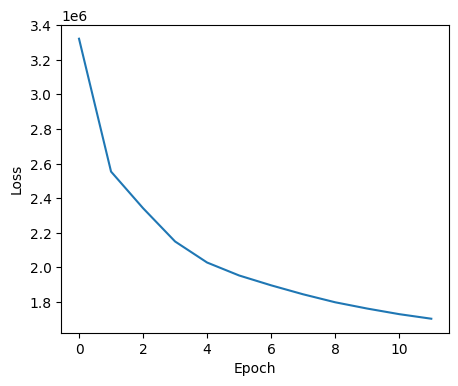

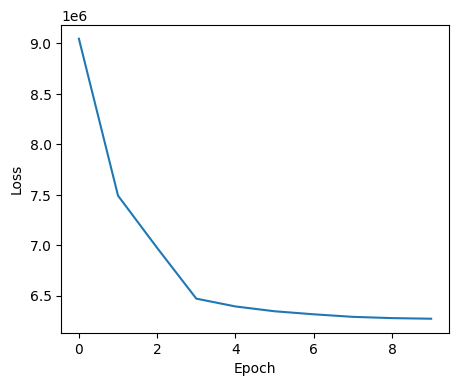

In [5]:
# fit the cell types
# fitting will stop once the change in loss falls below delta_loss
for i in range(len(filenames)):
    ast[i].fit_type(max_epochs=10, n_init=3, n_init_epochs=2)
    plt.figure(figsize=(5,4))
    plt.plot(np.arange(len(ast[i].get_type_losses())), ast[i].get_type_losses())
    plt.ylabel("Loss")
    plt.xlabel("Epoch")

<class 'pandas.core.frame.DataFrame'>
       Normal Epithelial cells   Tumor cells  Proliferating Tumor cells  \
1                     0.999401  3.745259e-14               1.759238e-09   
2                     0.999731  6.903814e-12               2.685451e-08   
3                     0.000024  3.739427e-07               6.131868e-04   
4                     0.999683  5.617747e-10               5.374220e-08   
5                     0.003286  8.972420e-06               2.845408e-04   
...                        ...           ...                        ...   
56091                 0.744287  7.454112e-08               1.228079e-05   
56092                 0.999932  3.410817e-12               4.247222e-10   
56093                 0.999883  7.962177e-11               1.353931e-08   
56094                 0.999631  1.518048e-13               2.049648e-10   
56095                 0.987254  1.869401e-10               1.095075e-08   

       Myoepithelial cells  Granulocytes     Telocytes  Endot

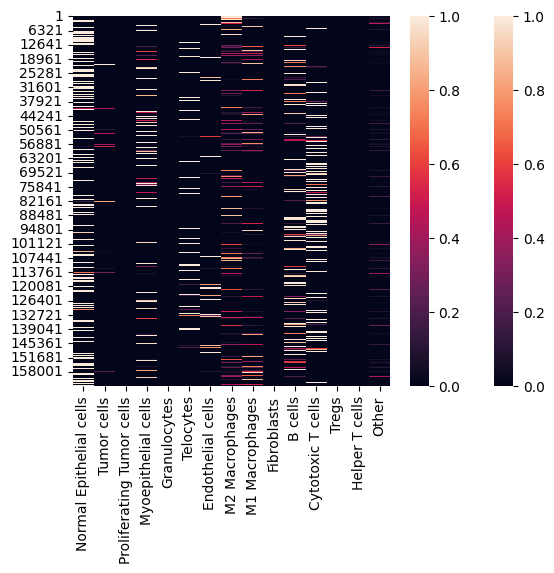

In [6]:
# assign the cell types
assignments = []
for i in range(len(filenames)):
    assignments.append(ast[i].get_celltype_probabilities())
    print(type(assignments[i]))
    print(assignments[i])
    sns.heatmap(assignments[i])
    print(ast[i].get_celltypes())
    ast[i].diagnostics_celltype().head(n=10)

In [6]:
# save the cell types
for i in range(len(filenames)):
    ast[i].type_to_csv('./'+filenames[i]+'_cell-types.csv')
    assignments[i].to_csv('./'+filenames[i]+'_cell-probs.csv')